# Decision Tree Classifier

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# data source: https://www.kaggle.com/datasets/mastmustu/income
df = pd.read_csv('train.csv')

In [2]:
#repeat data processing from Hw1
#workclass
numPrivate = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum())).Private * (df['workclass'].isna().sum()))
numSeni = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Self-emp-not-inc'] * (df['workclass'].isna().sum()))
numLocal = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Local-gov'] * (df['workclass'].isna().sum()))
numState = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['State-gov'] * (df['workclass'].isna().sum()))
numSei = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Self-emp-inc'] * (df['workclass'].isna().sum()))
numFed = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Federal-gov'] * (df['workclass'].isna().sum()))
numWithout = round((df['workclass'].value_counts()/(df['workclass'].shape[0] - df['workclass'].isna().sum()))['Without-pay'] * (df['workclass'].isna().sum()))
numNever = (df['workclass'].isna().sum()) - numPrivate - numSeni - numLocal - numState - numSei - numFed - numWithout

if numPrivate > 0:
    df['workclass'] = df['workclass'].fillna('Private', limit = numPrivate)

if numSeni > 0:
    df['workclass'] = df['workclass'].fillna('Self-emp-not-inc', limit = numSeni)

if numLocal > 0:
    df['workclass'] = df['workclass'].fillna('Local-gov', limit = numLocal)

if numState > 0:
    df['workclass'] = df['workclass'].fillna('State-gov', limit = numState)

if numSei > 0:
    df['workclass'] = df['workclass'].fillna('Self-emp-inc', limit = numSei)

if numFed > 0:
    df['workclass'] = df['workclass'].fillna('Federal-gov', limit = numFed)
    
if numWithout > 0:
    df['workclass'] = df['workclass'].fillna('Without-pay', limit = numWithout)

if numNever > 0:
    df['workclass'] = df['workclass'].fillna('Never-worked', limit = numNever)
    
#occupation  
numAF = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Armed-Forces'] * (df['occupation'].isna().sum()))
numPHS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Priv-house-serv'] * (df['occupation'].isna().sum()))
numCR = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Craft-repair'] * (df['occupation'].isna().sum()))
numProfS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Prof-specialty'] * (df['occupation'].isna().sum()))
numEM = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Exec-managerial'] * (df['occupation'].isna().sum()))
numAC = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Adm-clerical'] * (df['occupation'].isna().sum()))
numSale = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Sales'] * (df['occupation'].isna().sum()))
numOS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Other-service'] * (df['occupation'].isna().sum()))
numMOI = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Machine-op-inspct'] * (df['occupation'].isna().sum()))
numTM = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Transport-moving'] * (df['occupation'].isna().sum()))
numHC = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Handlers-cleaners'] * (df['occupation'].isna().sum()))
numFF = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Farming-fishing'] * (df['occupation'].isna().sum()))
numTS = round((df['occupation'].value_counts()/(df['occupation'].shape[0] - df['occupation'].isna().sum()))['Tech-support'] * (df['occupation'].isna().sum()))
numProtS = (df['occupation'].isna().sum()) - numAF - numPHS - numCR - numProfS - numEM - numAC - numSale - numOS - numMOI - numTM - numHC - numFF - numTS

if numCR > 0:
    df['occupation'] = df['occupation'].fillna('Craft-repair', limit = numCR)

if numProfS > 0:
    df['occupation'] = df['occupation'].fillna('Prof-specialty', limit = numProfS)
    
if numEM > 0:
    df['occupation'] = df['occupation'].fillna('Exec-managerial', limit = numEM)
    
if numAC > 0:
    df['occupation'] = df['occupation'].fillna('Adm-clerical', limit = numAC)
    
if numSale > 0:
    df['occupation'] = df['occupation'].fillna('Sales', limit = numSale)
    
if numOS > 0:
    df['occupation'] = df['occupation'].fillna('Other-service', limit = numOS)
    
if numMOI > 0:
    df['occupation'] = df['occupation'].fillna('Machine-op-inspct', limit = numMOI)
    
if numTM > 0:
    df['occupation'] = df['occupation'].fillna('Transport-moving', limit = numTM)
    
if numHC > 0:
    df['occupation'] = df['occupation'].fillna('Handlers-cleaners', limit = numHC)
    
if numFF > 0:
    df['occupation'] = df['occupation'].fillna('Farming-fishing', limit = numFF)
    
if numTS > 0:
    df['occupation'] = df['occupation'].fillna('Tech-support', limit = numTS)
    
if numProtS > 0:
    df['occupation'] = df['occupation'].fillna('Protective-serv', limit = numProtS)
    
if numPHS > 0:
    df['occupation'] = df['occupation'].fillna('Priv-house-serv', limit = numPHS)
    
if numAF > 0:
    df['occupation'] = df['occupation'].fillna('Armed-forces', limit = numAF)
    
    
#native country
df.loc[~df['native-country'].isin(['United-States']), 'native-country'] = 1
df.loc[df['native-country'].isin(['United-States']), 'native-country'] = 0

#fnlwgt
df.drop('fnlwgt', axis=1, inplace=True)

#education
df.drop('education', axis=1, inplace=True)

#capital gain and capital loss
df['capital-gain'] = df['capital-gain'].astype(float)
df.loc[df['capital-gain'] > 0, 'capital-gain'] = 1
df['capital-loss'] = df['capital-loss'].astype(float)
df.loc[df['capital-loss'] > 0, 'capital-loss'] = 1

#age
df['age'] = df['age'].astype(float)
df.loc[df['age'] > 80, 'age'] = 90
df.loc[df['age'].between(71,80), 'age'] = 80
df.loc[df['age'].between(61,70), 'age'] = 70
df.loc[df['age'].between(51,60), 'age'] = 60
df.loc[df['age'].between(41,50), 'age'] = 50
df.loc[df['age'].between(31,40), 'age'] = 40
df.loc[df['age'].between(21,30), 'age'] = 30
df.loc[df['age'].between(11,20), 'age'] = 20

#gender
df.gender = df.gender.map({ 'Male': 0, 'Female': 1 })

#hours per week
df['hours-per-week'] = df['hours-per-week'].astype(float)
df.loc[df['hours-per-week'] > 90, 'hours-per-week'] = 100
df.loc[df['hours-per-week'].between(81,90), 'hours-per-week'] = 90
df.loc[df['hours-per-week'].between(71,80), 'hours-per-week'] = 80
df.loc[df['hours-per-week'].between(61,70), 'hours-per-week'] = 70
df.loc[df['hours-per-week'].between(51,60), 'hours-per-week'] = 60
df.loc[df['hours-per-week'].between(41,50), 'hours-per-week'] = 50
df.loc[df['hours-per-week'].between(31,40), 'hours-per-week'] = 40
df.loc[df['hours-per-week'].between(21,30), 'hours-per-week'] = 30
df.loc[df['hours-per-week'].between(11,20), 'hours-per-week'] = 20
df.loc[df['hours-per-week'].between(1,10), 'hours-per-week'] = 10

# one hot encoding
for column in ['workclass', 'marital-status', 'occupation', 'relationship', 'race']:
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1).drop([column], axis=1)
    
#move income >= 50K to last column
df = df[['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Federal-gov',
       'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces',
       'Armed-forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-moving', 'Husband', 'Not-in-family',
       'Other-relative', 'Own-child', 'Unmarried', 'Wife',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'income_>50K']]

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
# Load in our dataset
iris = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

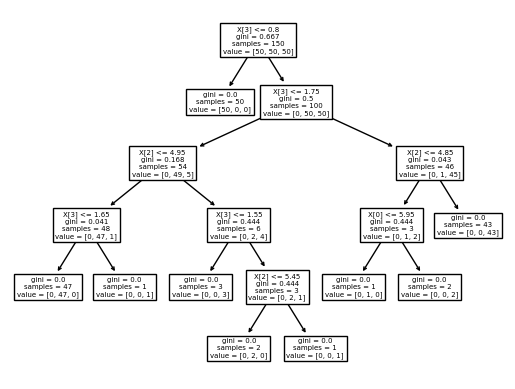

In [4]:
tree.plot_tree(classification_tree)

In [5]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(classification_tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores);

print('mean: ' + str(np.mean(n_scores)))
print('standard dev: ' + str(np.std(n_scores)))

[0.81278435 0.81028207 0.80755232 0.81346679 0.81050955 0.81505914
 0.81596906 0.81797497 0.80659841 0.81365188 0.80186533 0.81028207
 0.81801638 0.8077798  0.81619654 0.81119199 0.81210191 0.81592719
 0.82138794 0.82070535 0.81073703 0.81255687 0.82051865 0.80800728
 0.81096451 0.81915378 0.81574158 0.8109215  0.8109215  0.81547213]
mean: 0.8131432632761952
standard dev: 0.004507606740690683


# Max_depth
Changing the map depth did not strongly affect the resulting tree. It just led the tree to be cut off after reaching a certain depth, with the resulting gini scores unchanged and non-zero at three of four of the leaf nodes. It did not affect the splits in the tree.

In [6]:
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(max_depth = 3)

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

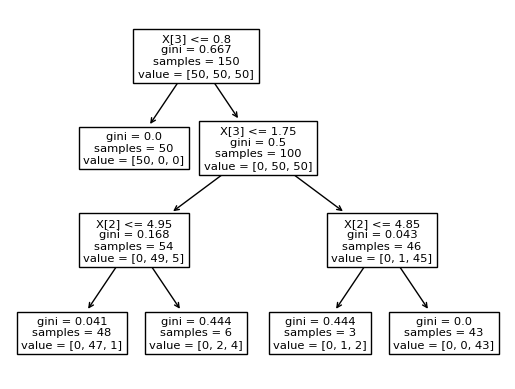

In [7]:
tree.plot_tree(classification_tree) #just cuts tree off, leaves have gini > 0

# Max_leaf_nodes
This parameter cut the tree off short in order to not go over the maximum leaf nodes. It did so following the same rule as usual, splitting nodes when it would lead to the largest reduction in impurity.

[Text(0.4, 0.875, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8, 0.375, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

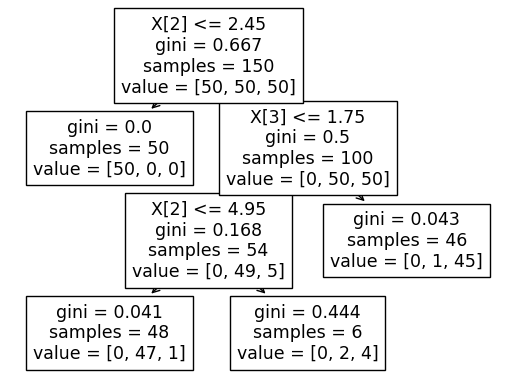

In [8]:
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 4)

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

tree.plot_tree(classification_tree)

# Ccp_alpha
Usually, the decision tree will not undergo minimal cost-complexity pruning but setting this value enables pruning. If ccp_alpha is set above or equal to 0.1 it will result in a tree with a single root node and no other connecting nodes, likely because the pruning was not selective enough. Decreasing ccp_alpha to 0.01 will increase the trees size to 9 total nodes. Decreasing it further to 0.001 results in a tree that is the same as the original because pruning was too selective and no nodes were pruned.

[Text(0.5, 0.9, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.5, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.3333333333333333, 0.3, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

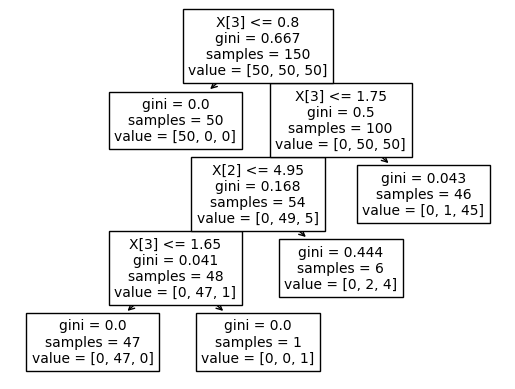

In [9]:
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(ccp_alpha = .01)

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

tree.plot_tree(classification_tree)

# Bagging
I used a random forest

In [10]:
model_bag = RandomForestClassifier()
model_bag.fit(X,y)

cv_bag = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_bag = cross_val_score(model_bag, X, y, scoring='accuracy', cv=cv_bag, n_jobs=-1, error_score='raise')
print(n_scores_bag);

print('mean: ' + str(np.mean(n_scores_bag)))
print('standard dev: ' + str(np.std(n_scores_bag)))

[0.82984531 0.8343949  0.8343949  0.83280255 0.8266606  0.83007279
 0.84281165 0.83731513 0.82207053 0.8370876  0.83189263 0.83712466
 0.82870792 0.82461328 0.83803458 0.83621474 0.83052775 0.83299204
 0.83663254 0.83754266 0.83212011 0.83052775 0.83303003 0.83530482
 0.83257507 0.83712466 0.83257507 0.82707622 0.83367463 0.83299204]
mean: 0.8329579722732047
standard dev: 0.004325809660401973


# Boosting
I used gradient boosting

In [11]:
model_boost = GradientBoostingClassifier()
model_boost.fit(X,y)

cv_boost = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_boost = cross_val_score(model_boost, X, y, scoring='accuracy', cv=cv_boost, n_jobs=-1, error_score='raise')
print(n_scores_boost);

print('mean: ' + str(np.mean(n_scores_boost)))
print('standard dev: ' + str(np.std(n_scores_boost)))

[0.84008189 0.85009099 0.84622384 0.84895359 0.84872611 0.85077343
 0.85577798 0.85756542 0.84163823 0.84323094 0.84622384 0.84463148
 0.84622384 0.84736124 0.85464058 0.84849864 0.84804368 0.84846416
 0.85073948 0.8480091  0.84758872 0.84121929 0.84849864 0.85100091
 0.84235669 0.8566879  0.84690628 0.84687144 0.84732651 0.85005688]
mean: 0.848147057189578
standard dev: 0.004218719994625767


# Bagging Versus Boosting
Both techniques resulted in a similar increase in accuracy of the original model, with gradient boosting having a slighly larger improvement. Additionally, they both had a similarly small standard deviation, indicating they both produced fairly accurate and consistent models.

# Effectiveness of the Models
Based on the k-fold cross-validation, where the chosen k was 10, all models were similarly accurate, with means in the low eighties. Gradient boosting produced the most accurate model, while the plain classification tree produced the least accurate, though the difference in accuracy between all three models was very small.
10-fold cross-validation is suitable for this problem because the amount of data being used is not incredibly large, so this method of assessing effectiveness utilizes that data for assessing effectiveness. So, it eliminates the need to section the data into testing and training groups, which would futher reduce the amount of data that could be used for training. 10-fold cross-validation also produces a more accurate measure of effectiveness as it produces 10 models and assesses the effectiveness of each one, rather than utilizing just one model like a train-test split would. Choosing 10 as a k-value, as opposed to any other number, is suitable for this problem as it has been experimentally shown that this k-value tends to result in a model skill estimate with low bias. Choosing a different k-value may result in a less accurate estimate of model accuracy. 
As seen below, choosing a regular train-test split does result in a similar level of accuracy as the 10-fold cross-validation. However, this effectiveness estimation may be less accurate than the 10-fold cross-validation as fewer samples were used to test the model. So, while it may not have made a huge difference for this particular set of data, 10-fold cross-validation often leads to a more accurate prediction of a model's effectiveness.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classification_tree2 = tree.DecisionTreeClassifier()
classification_tree2 = classification_tree.fit(X_train, y_train)

score = classification_tree2.score(X_test, y_test)
print(score)
print('mean: ' + str(score))

0.8173339399454049
mean: 0.8173339399454049
